In [10]:
%matplotlib inline

In [9]:
import primus_utils
from primus_utils import PACKAGE_DIRECTORIES
import random
import matplotlib.pyplot as plt
import numpy as np

In [3]:
incipit_directories = primus_utils.get_insipit_directories(PACKAGE_DIRECTORIES)

In [21]:
index = int(random.random() * len(incipit_directories))
incipit_dir = incipit_directories[index]

In [22]:
incipit, path = primus_utils.load_incipit(incipit_dir)

In [23]:
lines = primus_utils.get_staff_line_rows(incipit)

In [24]:
top, bottom = lines[0], lines[-1]

In [40]:
incipit[top-1:top+1, :] = 2
incipit[bottom-1:bottom+1, :] = 2

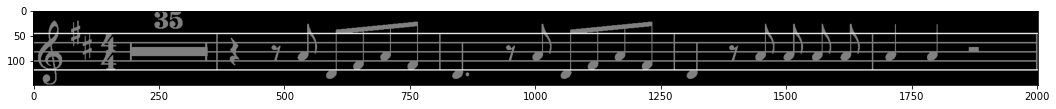

In [41]:
_, ax = plt.subplots(figsize=(18, 2))
ax.imshow(incipit, cmap='gray')

In [11]:
N = 20
file_and_rows = []

/home/macosta/anaconda3/envs/mir/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


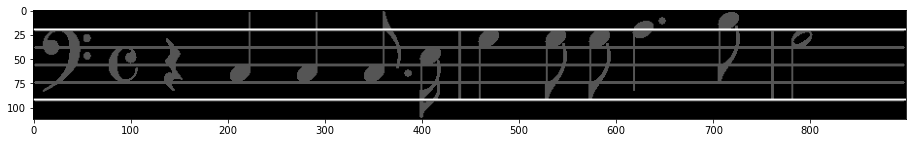

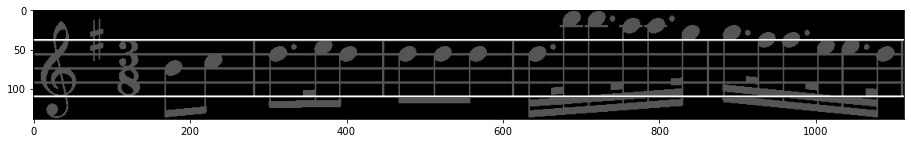

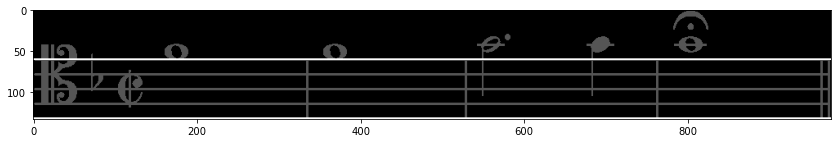

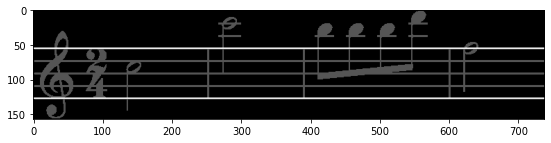

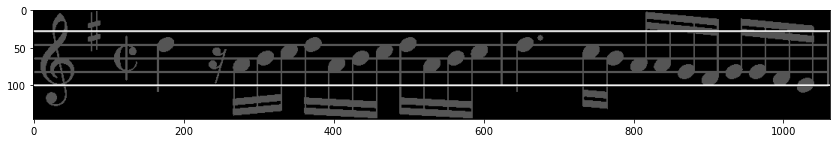

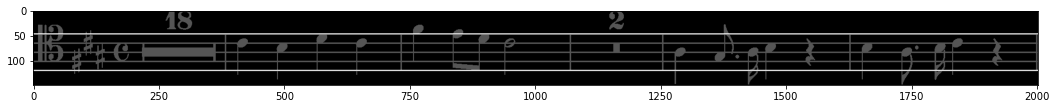

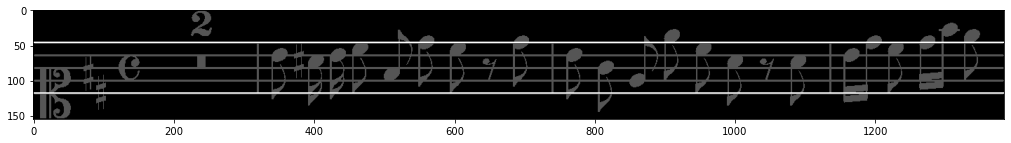

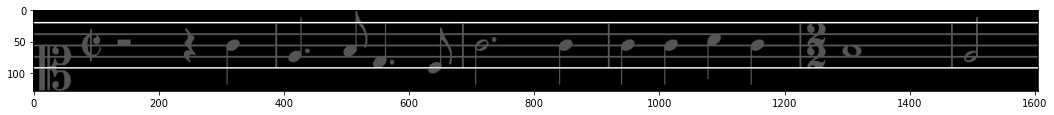

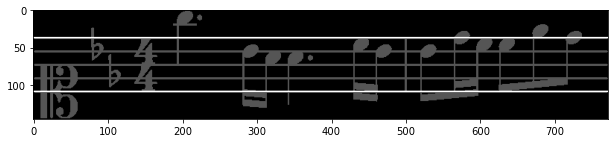

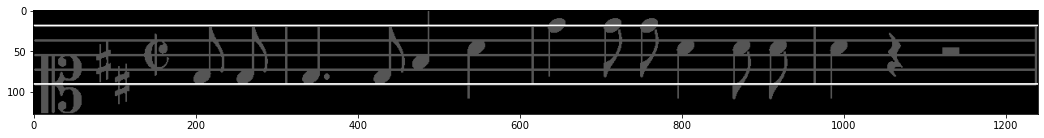

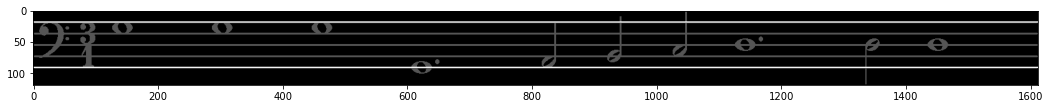

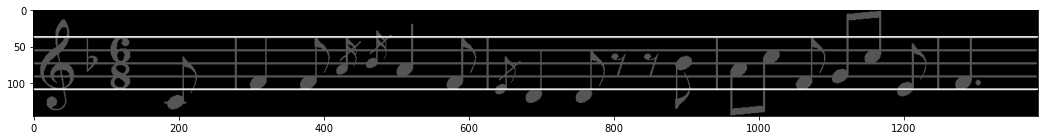

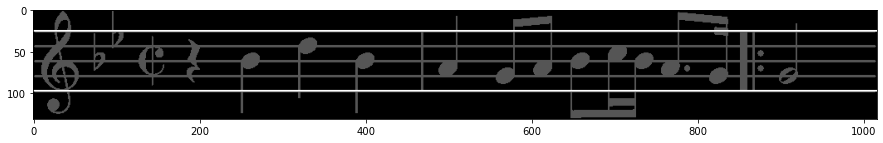

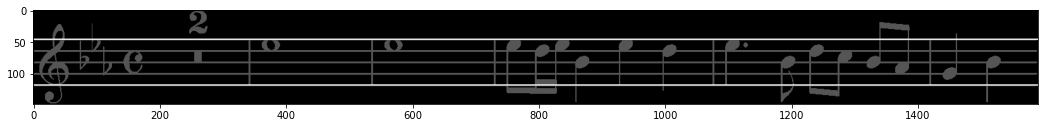

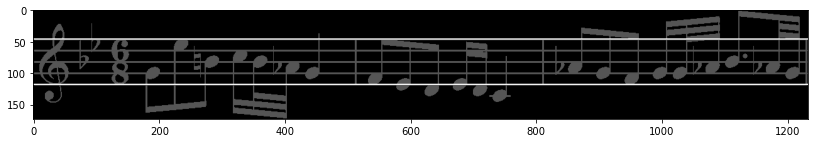

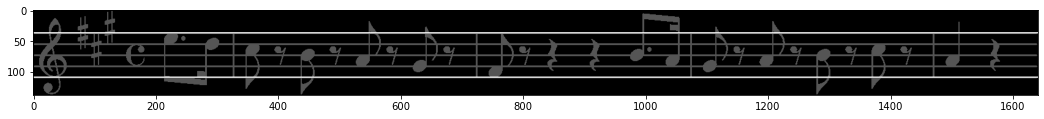

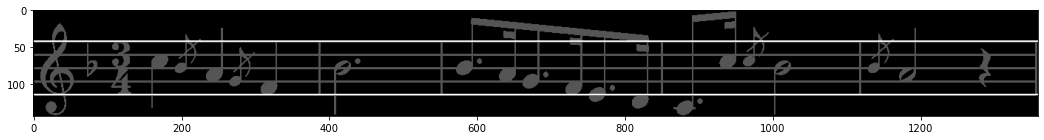

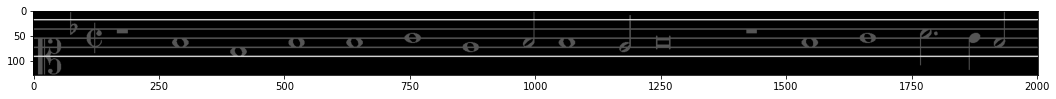

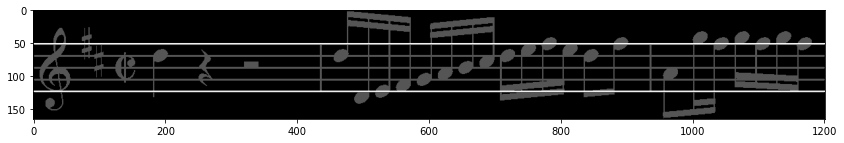

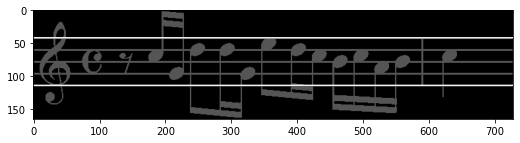

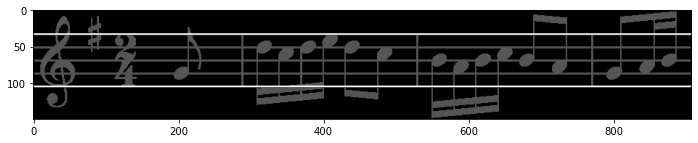

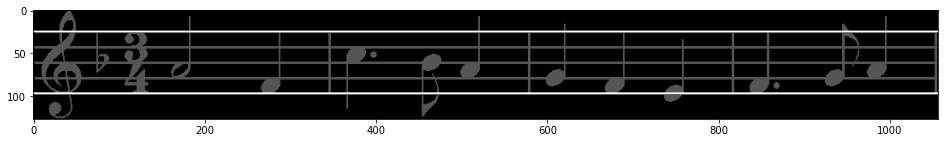

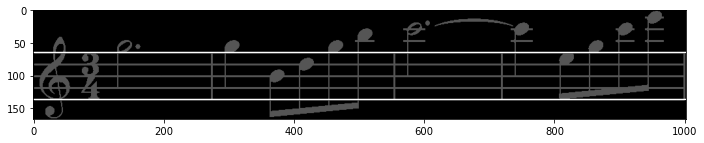

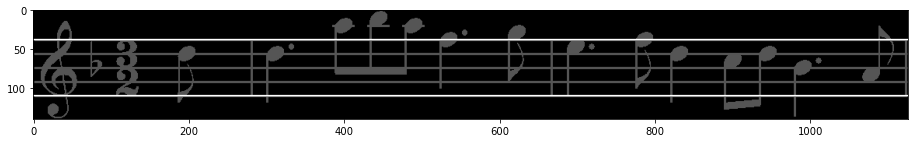

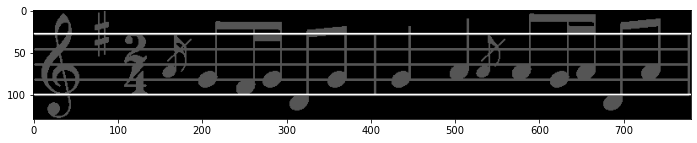

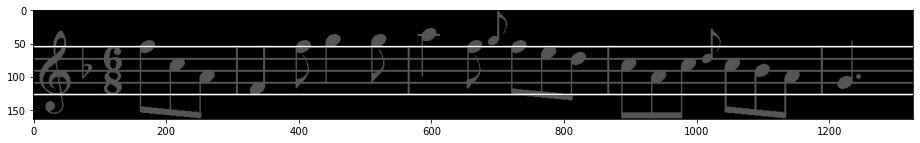

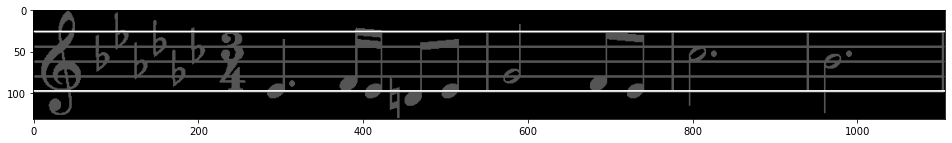

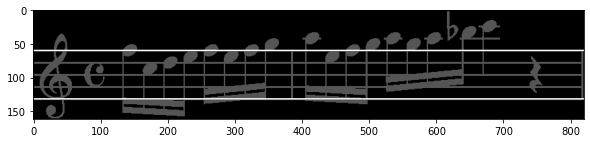

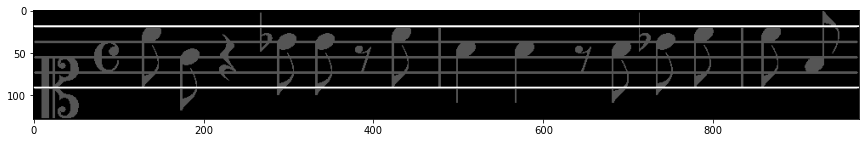

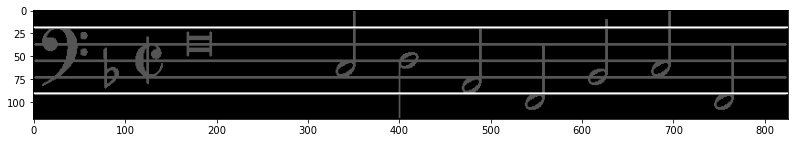

In [8]:
for _ in range(N):
    index = int(random.random() * len(incipit_directories))
    incipit_dir = incipit_directories[index]
    incipit, path = primus_utils.load_incipit(incipit_dir)
    lines = primus_utils.get_staff_line_rows(incipit)
    top, bottom = lines[0], lines[-1]
    incipit[top-1:top+1, :] = 3
    incipit[bottom-1:bottom+1, :] = 3
    _, ax = plt.subplots(figsize=(18, 2))
    ax.imshow(incipit, cmap='gray')
    file_and_rows.append((str(path), top, bottom))

In [15]:
file_and_rows[:3]

[('/home/macosta/ttmp/primus/package_aa/000112988-1_1_1/000112988-1_1_1.png',
  38,
  110),
 ('/home/macosta/ttmp/primus/package_aa/000119341-1_1_1/000119341-1_1_1.png',
  47,
  119),
 ('/home/macosta/ttmp/primus/package_ab/220015232-1_1_2/220015232-1_1_2.png',
  46,
  118)]

In [16]:
with open('staff_rows_data.txt', 'w') as f:
    data = [' '.join([str(item) for item in example]) for example in file_and_rows]
    data_with_newlines = [f"{line}\n" for line in data]
    f.writelines(data_with_newlines)

In [9]:
max_height = max([vector.shape[0] for vector in row_sum_vectors])

In [10]:
row_sum_dataset = np.zeros((N, max_height))

In [11]:
for i, row_sum in enumerate(row_sum_vectors):
    row_sum_dataset[i,0:len(row_sum)] = row_sum

In [12]:
row_sum_dataset

array([[ 0.,  1.,  3., ..., 65.,  0.,  0.],
       [ 0., 18., 24., ...,  0.,  0.,  0.],
       [ 7., 17., 21., ...,  0.,  0.,  0.],
       ...,
       [ 0., 13., 24., ...,  0.,  0.,  0.],
       [ 0.,  2.,  2., ...,  0.,  0.,  0.],
       [ 0.,  6., 11., ...,  0.,  0.,  0.]])

In [2]:
with open('staff_rows_data.txt', 'r') as f:
    raw_data = f.read()

In [29]:
lines = raw_data.split('\n')
data = [line.split() for line in lines][:-1]
data[:3]

[['/home/macosta/ttmp/primus/package_aa/000112988-1_1_1/000112988-1_1_1.png',
  '38',
  '110'],
 ['/home/macosta/ttmp/primus/package_aa/000119341-1_1_1/000119341-1_1_1.png',
  '47',
  '119'],
 ['/home/macosta/ttmp/primus/package_ab/220015232-1_1_2/220015232-1_1_2.png',
  '46',
  '118']]

In [16]:
all_row_sums = []
all_start_end = []
for path, start_row, end_row in data:
    all_row_sums.append(primus_utils.get_row_sums(path))
    all_start_end.append([int(start_row), int(end_row)])

In [19]:
max_height = max(len(vector) for vector in all_row_sums)
max_height

170

In [23]:
X = np.zeros((len(all_row_sums), max_height))
for i, row_sums in enumerate(all_row_sums):
    X[i, :len(row_sums)] = row_sums

In [24]:
X

array([[ 0.,  4., 11., ...,  0.,  0.,  0.],
       [ 0.,  1.,  3., ...,  0.,  0.,  0.],
       [ 0.,  8., 13., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  7., 12., ...,  0.,  0.,  0.],
       [ 0.,  2.,  2., ..., 17.,  7.,  0.],
       [ 0.,  6., 16., ...,  0.,  0.,  0.]])

In [25]:
Y = np.zeros((len(all_start_end), max_height))
for i, (start, end) in enumerate(all_start_end):
    Y[i, start:end+1] = 1

In [27]:
Y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

/home/macosta/primus-rnd/primus_utils.py:118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=(18, 2))


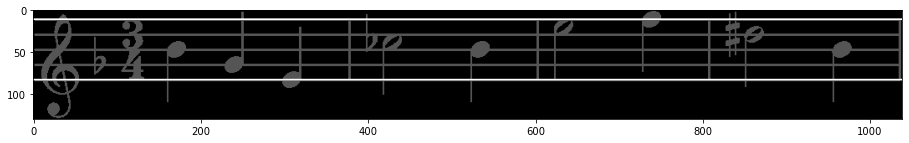

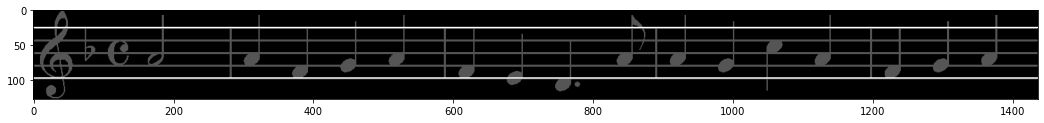

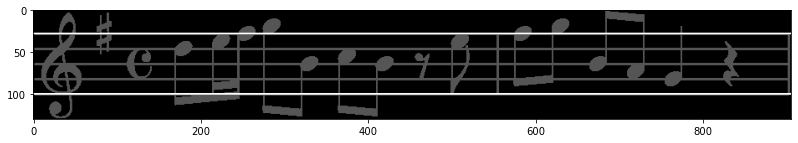

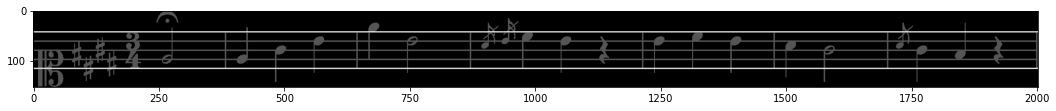

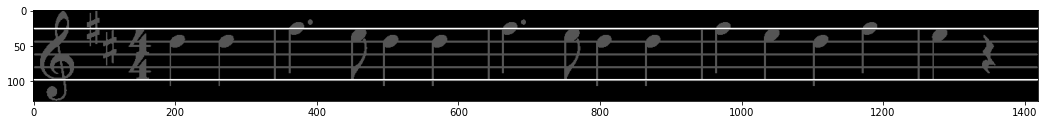

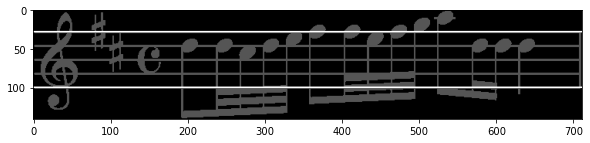

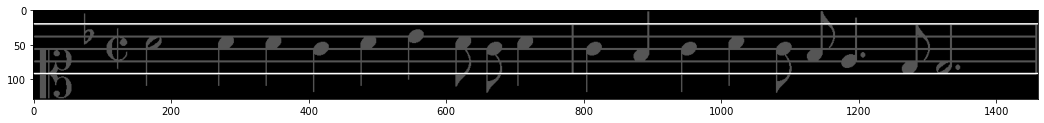

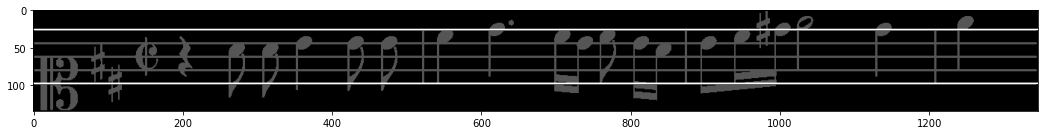

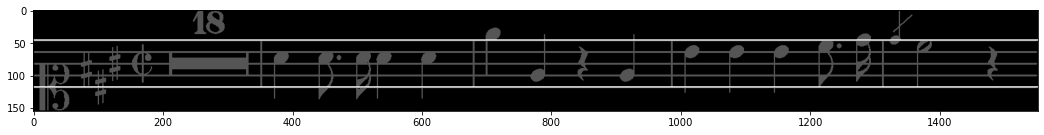

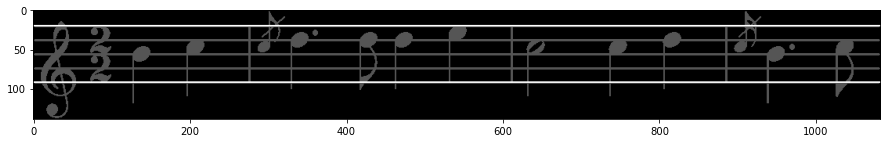

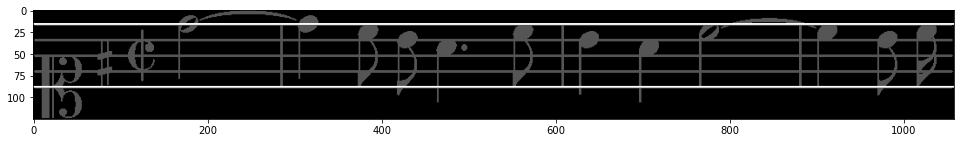

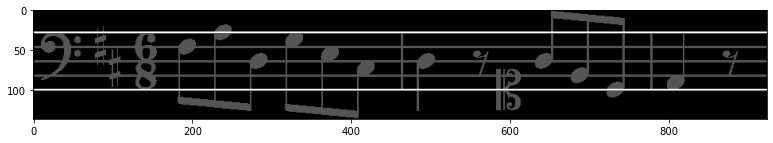

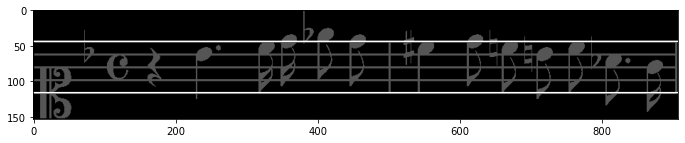

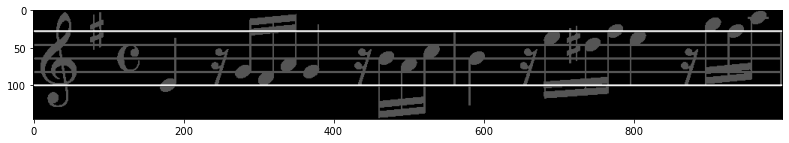

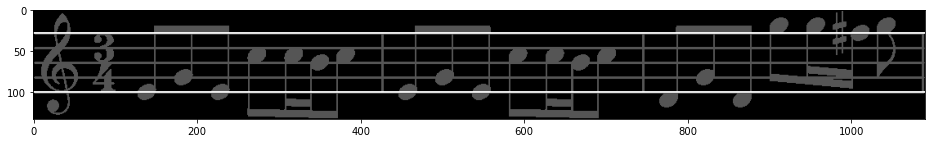

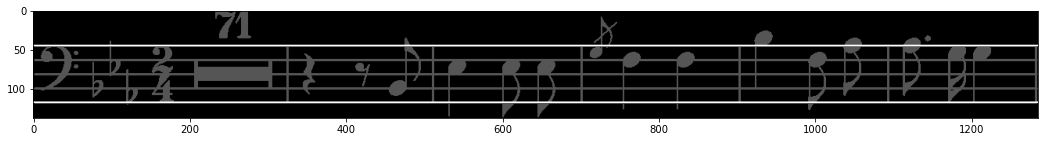

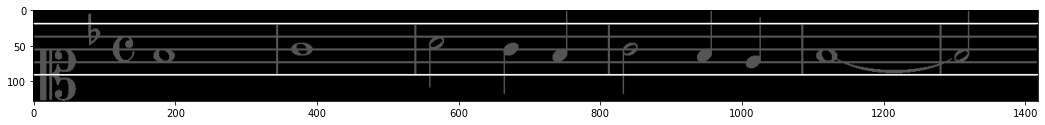

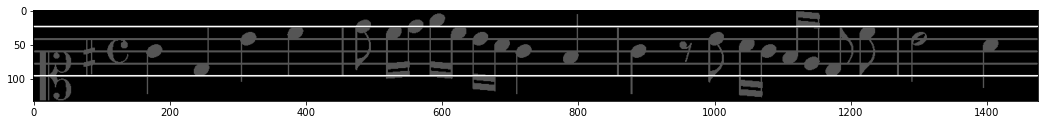

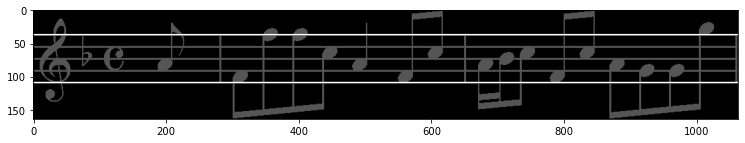

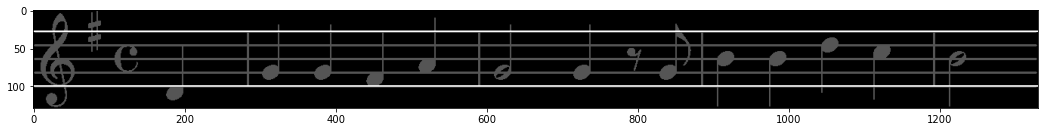

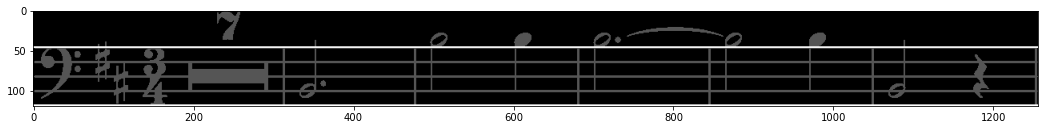

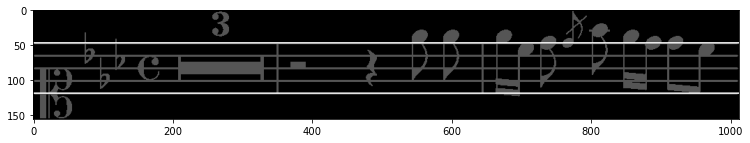

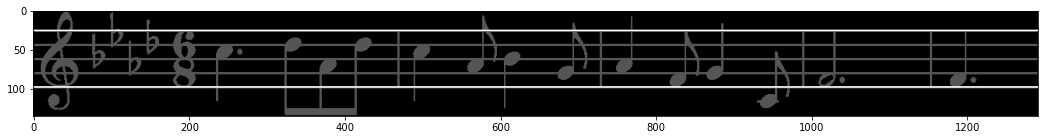

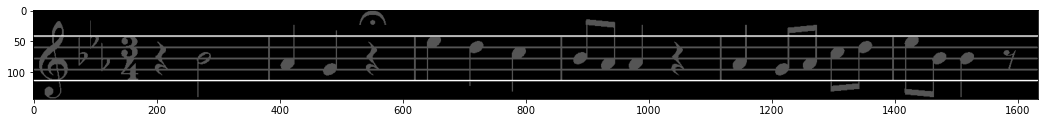

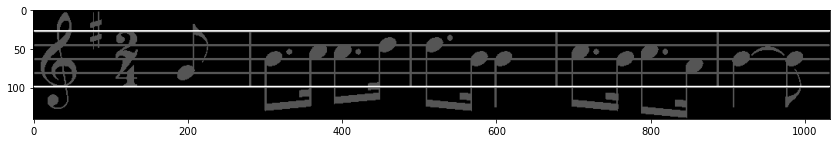

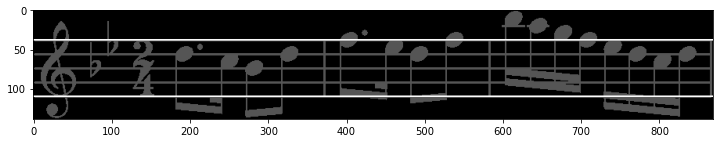

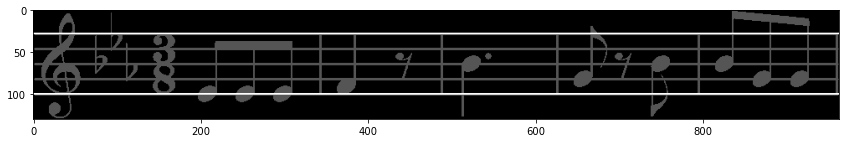

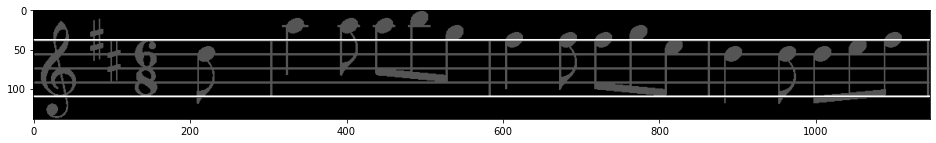

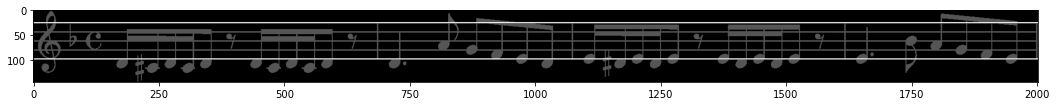

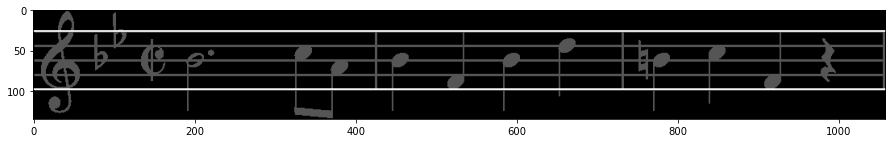

In [12]:
primus_utils.create_data_txt_file('staff_rows_data_30.txt', n=30, show=True)

In [16]:
primus_utils.save_X_Y_data_from_txt('staff_rows_data_30.txt', X_savename="X_30.npy", Y_savename="Y_30.npy")

In [15]:
np.load("X_30.npy").shape

(1000, 228)

In [13]:
np.load("Y.npy")[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])